In [79]:
import numpy as np
import pandas as pd
def extractData(f):
    Data2 = pd.read_csv(f) #Cek lokasi dan nama file
    #Data2=Data2[Data2['class'] !='normal'] ##PILIH DATA TANPA NORMAL
    Y = Data2["class"]
    X = Data2.drop(["class"], axis = 1)
    X= X.drop(["ASK"],axis=1)
    return X, Y, Data2
def extractData2(f):
    Data2 = pd.read_csv(f) #Cek lokasi dan nama file
  #  Data2=Data2[Data2['class'] !='normal'] ##PILIH DATA TANPA NORMAL
    Y = Data2["class"]
    X = Data2.drop(["class"], axis = 1)
    return X, Y, Data2

X_Train, Y_Train, Data_Train = extractData("Train_4.csv")


X_Test, Y_Test, Data_Test = extractData2("kdd_test20.csv")
 

In [80]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#LABELENCODER
le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_Train2 = X_Train.apply(le.fit_transform)
X_Test2=X_Test.apply(le.fit_transform)
#StandardSCALER
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s=scaler.fit_transform(X_Train2)
X_test_s=scaler.fit_transform(X_Test2)

# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train_s)
normalizedX = scaler.transform(X_train_s)
normalizedX_test=scaler.fit_transform(X_test_s)
normalizedX

array([[-0.03360237, -0.02894926,  0.252404  , ...,  0.37573931,
        -0.08998514, -0.08737446],
       [-0.02183402, -0.01881055,  0.16400616, ..., -0.09426572,
         0.43356932,  0.41539397],
       [-0.03280658, -0.02826367,  0.24642644, ...,  0.36684085,
        -0.08785406, -0.08530521],
       ...,
       [-0.02041162, -0.01758511,  0.15332175, ..., -0.08812465,
         0.37772474,  0.38833254],
       [-0.01913556, -0.32635505, -0.13931396, ..., -0.08261545,
        -0.0512439 , -0.0497572 ],
       [-0.02624504, -0.44760648, -0.19107359, ..., -0.11330976,
        -0.07028267, -0.0682436 ]])

In [81]:
#HAPUS KOLOM (13 FITUR: 10-22)
disc=['logged_in','num_failed_logins','hot','num_access_files','num_shells','num_compromised','su_attempted','is_guest_login','root_shell','num_root','num_file_creations','num_outbound_cmds','is_host_login']
X_train2=pd.DataFrame(normalizedX, columns= X_Train.columns)
X_train2.head()
X_test2=pd.DataFrame(normalizedX_test, columns= X_Test.columns)
print(X_test2.head())
X_train_X=X_train2.drop(disc,axis=1)
X_test_X=X_test2.drop(disc,axis=1)
X_test_X.head()


   duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.035491      -0.304756 -0.261790  0.192409   0.319654  -0.113994   
1 -0.019318       0.190444 -0.017259  0.104732  -0.156061   0.594433   
2 -0.015235       0.150190  0.257997 -0.204771  -0.206490  -0.048934   
3 -0.014976       0.147635  0.253609 -0.201288  -0.202978  -0.048102   
4 -0.035542      -0.305196 -0.262168  0.192687   0.320116  -0.114159   

       land  wrong_fragment    urgent       hot            ...             \
0 -0.001689       -0.017480 -0.001602 -0.020037            ...              
1 -0.000919       -0.009515 -0.000872 -0.010906            ...              
2 -0.000725       -0.007504 -0.000688 -0.008601            ...              
3 -0.000713       -0.007376 -0.000676 -0.008455            ...              
4 -0.001691       -0.017505 -0.001605 -0.020066            ...              

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.131080            0.234003  

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.035491,-0.304756,-0.261790,0.192409,0.319654,-0.113994,-0.001689,-0.017480,-0.001602,0.305336,...,0.131080,0.234003,0.224147,-0.107720,0.310252,-0.070794,-0.174081,-0.173720,-0.094043,-0.093082
1,-0.019318,0.190444,-0.017259,0.104732,-0.156061,0.594433,-0.000919,-0.009515,-0.000872,-0.330033,...,0.071349,0.127372,0.122007,-0.058634,-0.255696,-0.038534,-0.094756,-0.094559,-0.051190,-0.050666
2,-0.015235,0.150190,0.257997,-0.204771,-0.206490,-0.048934,-0.000725,-0.007504,-0.000688,-0.160520,...,0.056268,-0.260437,-0.269355,0.076874,-0.201649,-0.030389,0.349480,0.349322,-0.040370,-0.039957
3,-0.014976,0.147635,0.253609,-0.201288,-0.202978,-0.048102,-0.000713,-0.007376,-0.000676,-0.132332,...,0.055311,-0.269479,-0.276366,0.045311,-0.198220,-0.029872,0.343536,0.343381,-0.039683,-0.039277
4,-0.035542,-0.305196,-0.262168,0.192687,0.320116,-0.114159,-0.001691,-0.017505,-0.001605,0.303539,...,0.131269,0.234341,0.224471,-0.107876,0.310700,-0.070896,-0.174333,-0.173971,-0.094179,-0.093216


In [82]:
X_train=X_train_X
y_train=Y_Train
X_test=X_test_X
y_test=Y_Test

In [83]:
y_test=y_test.replace({'dos':1 , 'normal': -1 , 'probe':1, 'r2l':1, 'u2r':1})
y_train=y_train.replace({'dos':1 , 'normal': -1 , 'probe':1, 'r2l':1, 'u2r':1})

In [84]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60.
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


In [100]:

#SAVE MODEL
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "svm_1_01.pkl"  
# Load from file
joblib_model = joblib.load(joblib_file)


In [101]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [102]:
class_names=[1,-1]

########ACCURACY TERHADAP DATA TEST########
Time to predict data test
0:00:40.66
Confusion matrix, without normalization
Keterangan:
1=DOS
2=Probe
3=R2L
4=U2R
             precision    recall  f1-score   support

         -1       0.95      1.00      0.98     19577
          1       1.00      0.99      0.99     79227

avg / total       0.99      0.99      0.99     98804

Accuracy One Vs Rest: 0.990102 


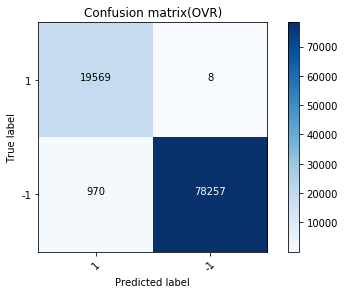

In [103]:
from time import time
print("########ACCURACY TERHADAP DATA TEST########")
start=time()
prediction_test=joblib_model.predict(X_test)
end=time()
jum=end-start
print ("Time to predict data test".format(hms_string(jum)))

print(hms_string(jum))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test, prediction_test)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix(OVR)')
print("Keterangan:" )

print("1=DOS")
print("2=Probe")
print("3=R2L")
print("4=U2R")

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))
from sklearn import metrics
sc=metrics.accuracy_score(y_test, prediction_test)
print("Accuracy One Vs Rest: %f " % (sc))

In [104]:
from sklearn.metrics import accuracy_score , cohen_kappa_score,  confusion_matrix
accuracy_score(y_test, prediction_test, normalize=True)
print("accuracy: ", metrics.accuracy_score(y_test, prediction_test))  
print("precision: ", metrics.precision_score(y_test, prediction_test))  
print("recall: ", metrics.recall_score(y_test, prediction_test))  
print("f1: ", metrics.f1_score(y_test, prediction_test))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, prediction_test)) 
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
tn, fp, fn, tp = confusion_matrix(y_test, prediction_test).ravel()
print("TN: %d , FP: %d , FN: %d , TP: %d" % ( tn,fp,fn,tp))

accuracy:  0.9901016153192178
precision:  0.9998977831725547
recall:  0.9877566991051031
f1:  0.9937901607700709
area under curve (auc):  0.9936740281549932
             precision    recall  f1-score   support

         -1       0.95      1.00      0.98     19577
          1       1.00      0.99      0.99     79227

avg / total       0.99      0.99      0.99     98804

[[19569     8]
 [  970 78257]]
TN: 19569 , FP: 8 , FN: 970 , TP: 78257
